In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from math import sqrt

In [2]:
ticker = "IOC.NS"
start = "2017-04-01"
end = "2024-01-20"

In [3]:
df = yf.download(ticker, start=start, end=end)
df.tail(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-08,134.000000,136.100006,132.250000,132.649994,132.649994,26199907
2024-01-09,134.899994,134.899994,131.550003,131.899994,131.899994,15051378
2024-01-10,130.949997,131.000000,128.500000,130.550003,130.550003,17547639
2024-01-11,131.350006,133.899994,131.100006,133.250000,133.250000,21653666
2024-01-12,133.449997,135.850006,132.750000,135.300003,135.300003,24471509
2024-01-15,136.449997,138.000000,135.199997,137.649994,137.649994,22824583
2024-01-16,138.250000,144.350006,137.500000,143.600006,143.600006,54350562
2024-01-17,143.000000,145.399994,141.550003,144.100006,144.100006,43031636
2024-01-18,143.800003,145.649994,139.899994,144.500000,144.500000,26958686


In [4]:
ClosingPrice = df['Close']

# print(data)
print(ClosingPrice.values.shape)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(ClosingPrice.values.reshape(-1, 1))
# print(scaled_data)

(1682,)


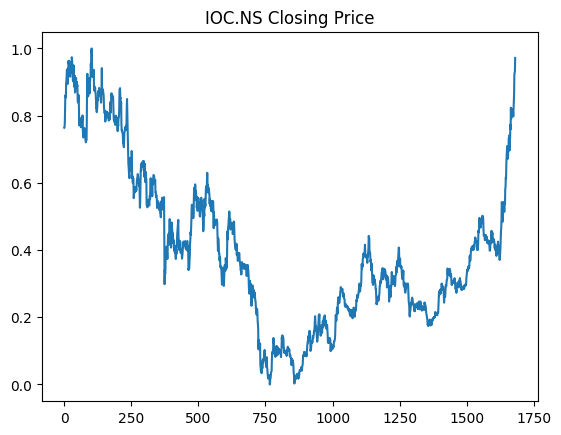

In [5]:
plt.plot(scaled_data)
plt.title(f'{ticker} Closing Price')
plt.show()

In [6]:
training_data_len = int(len(scaled_data) * 0.8)

training_data = scaled_data[0:training_data_len, :]
testing_data = scaled_data[training_data_len:, :]

len(training_data), len(testing_data)

(1345, 337)

In [7]:
past_values = 1

def create_training_data(data, past_values):
    if len(data) < past_values:
        return np.array([]), np.array([])
    X_train = []
    y_train = []
    for i in range(past_values, len(data)):
        X_train.append(data[i-past_values:i, 0])
        y_train.append(data[i, 0])
    return np.array(X_train), np.array(y_train)

X_train, y_train = create_training_data(training_data, past_values)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test, y_test = create_training_data(testing_data, past_values)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [8]:
len(X_train) + len(X_test), len(scaled_data)

(1680, 1682)

In [9]:
X_train.shape

(1344, 1, 1)

In [10]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=200, epochs=200, verbose=1)

Epoch 1/200
7/7 [==============================] - 13s 9ms/step - loss: 0.2128
Epoch 2/200
7/7 [==============================] - 0s 9ms/step - loss: 0.1615
Epoch 3/200
7/7 [==============================] - 0s 10ms/step - loss: 0.1123
Epoch 4/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0697
Epoch 5/200
7/7 [==============================] - 0s 13ms/step - loss: 0.0516
Epoch 6/200
7/7 [==============================] - 0s 12ms/step - loss: 0.0534
Epoch 7/200
7/7 [==============================] - 0s 13ms/step - loss: 0.0451
Epoch 8/200
7/7 [==============================] - 0s 18ms/step - loss: 0.0396
Epoch 9/200
7/7 [==============================] - 0s 14ms/step - loss: 0.0320
Epoch 10/200
7/7 [==============================] - 0s 12ms/step - loss: 0.0236
Epoch 11/200
7/7 [==============================] - 0s 14ms/step - loss: 0.0145
Epoch 12/200
7/7 [==============================] - 0s 12ms/step - loss: 0.0066
Epoch 13/200
7/7 [==============================] 

7/7 [==============================] - 0s 9ms/step - loss: 3.2536e-04
Epoch 101/200
7/7 [==============================] - 0s 7ms/step - loss: 3.2211e-04
Epoch 102/200
7/7 [==============================] - 0s 7ms/step - loss: 3.2452e-04
Epoch 103/200
7/7 [==============================] - 0s 7ms/step - loss: 3.2217e-04
Epoch 104/200
7/7 [==============================] - 0s 7ms/step - loss: 3.2723e-04
Epoch 105/200
7/7 [==============================] - 0s 7ms/step - loss: 3.3150e-04
Epoch 106/200
7/7 [==============================] - 0s 7ms/step - loss: 3.2309e-04
Epoch 107/200
7/7 [==============================] - 0s 8ms/step - loss: 3.2680e-04
Epoch 108/200
7/7 [==============================] - 0s 9ms/step - loss: 3.2346e-04
Epoch 109/200
7/7 [==============================] - 0s 10ms/step - loss: 3.3269e-04
Epoch 110/200
7/7 [==============================] - 0s 8ms/step - loss: 3.2368e-04
Epoch 111/200
7/7 [==============================] - 0s 8ms/step - loss: 3.2309e-04
Epoch

7/7 [==============================] - 0s 11ms/step - loss: 3.2768e-04
Epoch 198/200
7/7 [==============================] - 0s 12ms/step - loss: 3.2608e-04
Epoch 199/200
7/7 [==============================] - 0s 12ms/step - loss: 3.2275e-04
Epoch 200/200
7/7 [==============================] - 0s 12ms/step - loss: 3.2344e-04


In [11]:
pred_train = model.predict(X_train)
pred = model.predict(X_test)

11/11 [==============================] - 2s 6ms/step


In [12]:
pred_train = scaler.inverse_transform(pred_train)
pred = scaler.inverse_transform(pred)
y_test = scaler.inverse_transform([y_test])
y_train = scaler.inverse_transform([y_train])

In [13]:
y_test = y_test.flatten()
y_train = y_train.flatten()

Training Error
Mean Absolute Error (MAE): 1.3281192580858867
Root Mean Squared Error (RMSE): 1.8819285325263924


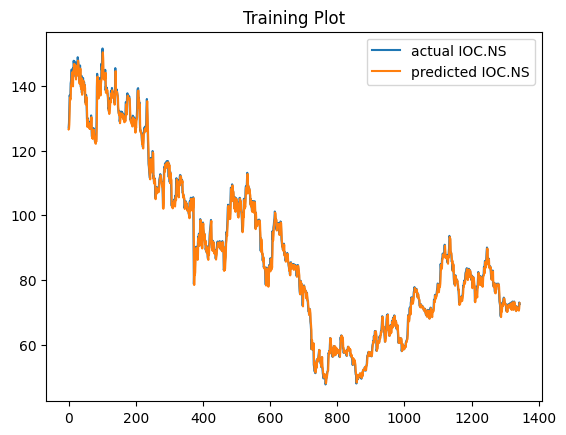

In [14]:
print("Training Error")
mae = mean_absolute_error(y_train, pred_train)
print("Mean Absolute Error (MAE):", mae)
rmse = sqrt(mean_squared_error(y_train, pred_train))
print("Root Mean Squared Error (RMSE):", rmse)
    
plt.plot(y_train, label = 'actual '+str(ticker))
plt.plot(pred_train, label = 'predicted '+str(ticker))
plt.title("Training Plot")
plt.legend()
plt.show()

Testing Error
Mean Absolute Error (MAE): 1.0356624239966983
Root Mean Squared Error (RMSE): 1.5153082412217078


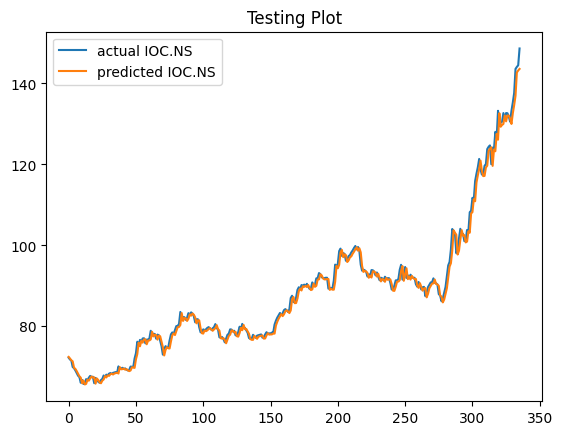

In [15]:
print("Testing Error")
mae = mean_absolute_error(y_test, pred)
print("Mean Absolute Error (MAE):", mae)
rmse = sqrt(mean_squared_error(y_test, pred))
print("Root Mean Squared Error (RMSE):", rmse)

plt.plot(y_test, label = 'actual '+str(ticker))
plt.plot(pred, label = 'predicted '+str(ticker))
plt.title("Testing Plot")
plt.legend()
plt.show()

## 10 days future prediction without correction

In [16]:
scaled_data

array([[0.76396024],
       [0.76460208],
       [0.77872268],
       ...,
       [0.92811303],
       [0.93196407],
       [0.97191908]])

In [17]:
len(X_train), len(X_test),  len(scaled_data)

(1344, 336, 1682)

In [18]:
reshaped_data = scaled_data.reshape(scaled_data.shape[0], scaled_data.shape[1], 1)

In [19]:
future_data_to_predict = reshaped_data[-10:]
future_data_to_predict

array([[[0.81787543]],

       [[0.81065463]],

       [[0.79765729]],

       [[0.82365212]],

       [[0.843389  ]],

       [[0.86601407]],

       [[0.92329917]],

       [[0.92811303]],

       [[0.93196407]],

       [[0.97191908]]])

In [20]:
X_test.ndim, reshaped_data.ndim

(3, 3)

In [21]:
def predict_future(last_input):
    
    res = model.predict(last_input)
    Output = scaler.inverse_transform(res)
    return Output

future_predictions_1 = predict_future(future_data_to_predict)
# print(future_predictions_1)

future_predictions_1 = future_predictions_1.flatten()
print(future_predictions_1)

1/1 [==============================] - 0s 52ms/step
[132.06082 131.32552 130.00058 132.64868 134.65433 136.9479  142.7264
 143.20999 143.59662 147.5954 ]


In [22]:
# def predict_future(last_input):
    
#     res = model.predict(last_input)
#     Output = scaler.inverse_transform(res)
#     return Output

# future_predictions_2 = predict_future(X_test[-5:])
# # print(future_predictions_2)

# future_predictions_2 = future_predictions_2.flatten()
# print(future_predictions_2)

In [23]:
day=range(1,(len(future_data_to_predict)+1))

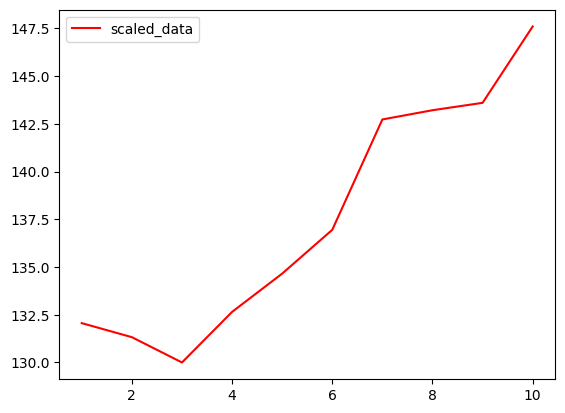

In [24]:
plt.plot(day, future_predictions_1, color='red', label='scaled_data')
# plt.plot(day, future_predictions_2, color='blue', label='x_test')
plt.legend()
plt.show()

In [25]:
# ticker = "AMZN"
# start='2024-01-22'
# end='2024-01-26'
# df = yf.download(ticker, start=start, end=end)
# # print(df)
# actual = df['Close'].values
# print(actual)

In [26]:
# day_actual = np.arange(1,21)
# day_pred = np.arange(1,21)

In [27]:
# plt.figure(figsize=(8,6))
# plt.title(f'Plot for {ticker} from {start} till {end}')
# plt.xlabel('No. of Days')
# plt.ylabel('Price Values')
# plt.plot(day_actual, actual, label = 'actual price', color='blue')
# plt.plot(day_pred, future_predictions_1, label = 'predicted price', color='red')
# plt.legend()
# plt.show()

## Buy and Sell

In [28]:
def get_control_vector(val):
    return np.diff(np.sign(np.diff(val)))

# def buy_and_sell_bot(val,controls):
#     inv = []
#     curr_val = 1000
#     inds = np.where(controls)[0]
#     buy_inds = np.where(controls>0)[0]
#     sell_inds = np.where(controls<0)[0]
#     max_limit = sell_inds[-1] if sell_inds[-1]>buy_inds[-1] else buy_inds[-1]
#     for i in range(buy_inds[0]+2):
#         inv.append(curr_val)
#     for i in range(buy_inds[0],max_limit+1):
#         if controls[i]>0:
#             buy_val = val[i+1]
#         elif controls[i]<0:
#             sell_val = val[i+1]
#             curr_val = curr_val*sell_val/buy_val
#         inv.append(curr_val)
        
#     if max_limit+1!=len(controls):
#         for i in range(len(controls)-max_limit-1):
#             inv.append(curr_val)
#     return inv

def buy_and_sell_bot(val, controls):
    inv = []
    curr_val = 1000
    buy_inds = np.where(controls > 0)[0]
    sell_inds = np.where(controls < 0)[0]
    
    if buy_inds.size == 0 or sell_inds.size == 0:
        return [curr_val] * len(controls)
    
    max_limit = max(sell_inds[-1], buy_inds[-1])
    for i in range(buy_inds[0] + 2):
        inv.append(curr_val)
        
    for i in range(buy_inds[0], max_limit + 1):
        if controls[i] > 0:
            buy_val = val[i + 1]
        elif controls[i] < 0:
            sell_val = val[i + 1]
            curr_val = curr_val * sell_val / buy_val
        inv.append(curr_val)
        
    if max_limit + 1 != len(controls):
        for i in range(len(controls) - max_limit - 1):
            inv.append(curr_val)
    
    return inv

In [29]:
controls_pred= get_control_vector(future_predictions_1)
amount_pred = buy_and_sell_bot(future_predictions_1, controls_pred)
controls_pred, amount_pred

(array([0., 2., 0., 0., 0., 0., 0., 0.], dtype=float32),
 [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000])

In [30]:
# controls_actual= get_control_vector(actual)
# amount_actual = buy_and_sell_bot(actual, controls_actual)
# controls_actual, amount_actual

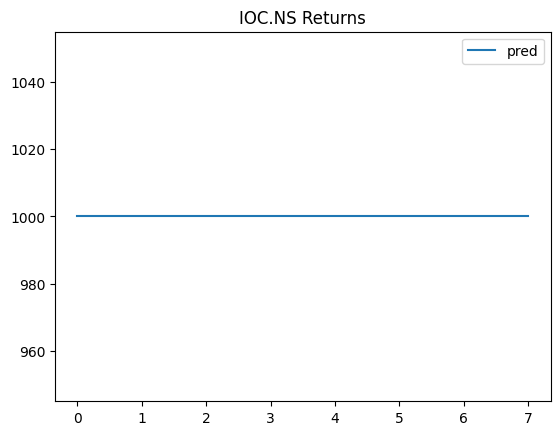

In [31]:
# plt.plot(amount_actual, label="actual")
plt.plot(amount_pred, label="pred")
plt.legend()
plt.title(f"{ticker} Returns")
plt.show()

### Price values along with dates

In [32]:
from datetime import datetime, timedelta
count=31
Date = []
for i in range(22,34):
    if i == 27:
        continue
    elif i == 28:
        continue
    elif i >= 32:
        i = i-count
        base_date = datetime(2024,2,i)
        formatted_date = base_date.strftime('%d-%m-%Y')
        Date.append(formatted_date)
    else:
        base_date = datetime(2024,1,i)
        formatted_date = base_date.strftime('%d-%m-%Y')
        Date.append(formatted_date)

In [33]:
price_value_dict = {}
price_value_dict['Date'] = Date
price_value_dict['Closing Price'] = future_predictions_1.tolist()

In [34]:
# price_value_dict

In [35]:
Price_with_dates = pd.DataFrame(price_value_dict)

In [36]:
Price_with_dates.columns = pd.MultiIndex.from_tuples([(f'{ticker}', 'Date'), (f'{ticker}', 'Closing Price')])

In [37]:
Price_with_dates

IOC.NS              
         Date Closing Price
0  22-01-2024    132.060822
1  23-01-2024    131.325516
2  24-01-2024    130.000580
3  25-01-2024    132.648682
4  26-01-2024    134.654327
5  29-01-2024    136.947906
6  30-01-2024    142.726395
7  31-01-2024    143.209991
8  01-02-2024    143.596619
9  02-02-2024    147.595398

In [38]:
ticker = "IOC.NS"
start = "2024-01-22"
end = "2024-01-31"

In [39]:
df = yf.download(ticker, start=start, end=end)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-22,148.649994,148.649994,148.649994,148.649994,148.649994,0
2024-01-23,151.500000,151.800003,137.850006,138.949997,138.949997,38167576
2024-01-24,138.949997,145.250000,138.050003,143.449997,143.449997,40122151
2024-01-25,145.899994,145.899994,142.000000,143.699997,143.699997,38252600
2024-01-29,143.699997,148.399994,143.500000,146.699997,146.699997,28420760
2024-01-30,148.399994,152.199997,146.500000,147.699997,147.699997,41368256


In [40]:
actual_data = df['Close'].values

In [41]:
day_actual = range(1,7)
day_predicted = range(1,11)

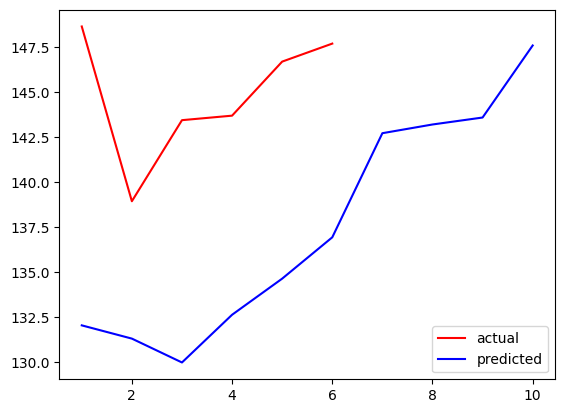

In [42]:
plt.plot(day_actual, actual_data, color='red', label='actual')
plt.plot(day_predicted, future_predictions_1, color='blue', label='predicted')
plt.legend()
plt.show()